# Upworthy A/B title testing `5 points`

Source: https://www.nature.com/articles/s41597-021-00934-7 and https://upworthy.natematias.com/.

The dataset itself is kind of a pain to get to, and can be downloaded directly from [here](https://osf.io/vy8mj/download), as linked to from [this page](https://osf.io/vy8mj/).

Description from [Data Is Plural](https://www.data-is-plural.com/archive/2021-08-18-edition/):

> The Upworthy Research Archive describes 32,000+ headline-testing experiments conducted in 2013–15 by Upworthy, the online publication that popularized a once-ubiquitous style of headline. The dataset, contributed by the publication to a team of academics, is split into three tranches for use in different phases of research. In total, it covers 150,000+ headline-plus-image permutations; for each, it provides the headline, an image identifier, the number of viewers assigned to see it, the number who clicked, and other details.

### Topis covered

* String functions
* Reading and understanding data dictionaries
* Sentiment analysis

## Two questions about questions `1 point`


Headlines that end in questions are so common there's even a rule about it: Betteridge's law of headlines! It states "Any headline that ends in a question mark can be answered by the word no."

### How often were Upworthy headlines phrased as questions?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [16]:
# 15% of the headlines were phrased as questions
df = pd.read_csv('upworthy-archive-confirmatory-packages-03.12.2020.csv')
df['question'] = df['headline'].str.contains('\?')
df.question.value_counts(normalize=True)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


False    0.84849
True     0.15151
Name: question, dtype: float64

### Are headlines with question marks more likely to succeed than ones without?

Along with your actual answer, defend what you mean by "succeed" (for example, what column you picked to represent success). You probably want to read the "Data Records" section from the source."

In [27]:
# Clicks and impressions are related to packages, not headlines. Therefore, it is hard to answer the question as it its phrased.
# Disconsidering this, I will consider the rate between impressions and clicks of packages as the metric of success for the headlines. 
# According to this metric, there is no evidence of a better performance of headlines with question marks.
df['clickperimpression'] = round(df.clicks/df.impressions*100,1)
df.groupby(by='question').median()['clickperimpression']

question
False    1.3
True     1.1
Name: clickperimpression, dtype: float64

In [61]:
df.head(3)

,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,question,clickperimpression,sentiment
0,11,2014-11-20 11:33:26.475,2016-04-02 16:25:54.046,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",<p>Iff you start with the basic fact that inno...,let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,3118,8,0.1,False,False,NaN,NaN,201446,True,0.3,-0.7579
1,12,2014-11-20 15:00:01.032,2016-04-02 16:25:54.128,546e01d626714c6c4400004e,Things that matter. Pass 'em on.,People Sent This Lesbian Questions And Her Rai...,<p>I'll be honest. I've wondered about 7.</p>,people-sent-this-lesbian-questions-and-her-rai...,546d1b4bfd3617f091000041,4587,130,55.8,False,False,NaN,NaN,201446,False,2.8,-0.4019
2,13,2014-11-20 11:33:51.973,2016-04-02 16:25:54.069,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,$3 Million Is What It Takes For A State To Leg...,<p>Iff you start with the basic fact that inno...,3-million-is-what-it-takes-for-a-state-to-lega...,546dce659ad54ec65b000041,3017,19,26.9,False,False,NaN,NaN,201446,False,0.6,-0.6486


### Upworthy was thought of as an "obnoxiously positive clickbait" kind of site. Does the data support this? `3 points`

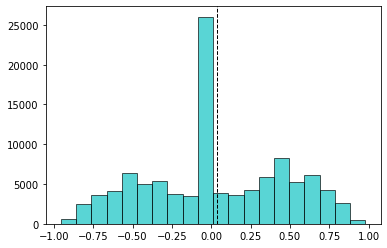

In [58]:
# No. It seems that most headlines were neutral.
sia = SIA()
df['sentiment'] = df['headline'].apply(lambda x:sia.polarity_scores(x)['compound'])
result = plt.hist(df.sentiment, bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df.sentiment.mean(), color='k', linestyle='dashed', linewidth=1)

In [59]:
df.sentiment.mean()

0.038628333222799634

In [60]:
df.sentiment.median()

0.0

### Were the selected headlines more likely to be positive or negative? `1 point`

In [66]:
# According to the documentation, only packages [1] were selected [2] - not headlines. 
# [1] "packages are bundles of headlines and images that were randomly assigned to people on the website as part of a test"
# [2] "winner: Whether a package was selected by editors to be used on the Upworthy site after the test"

# Anyway, it seems that headlines from selected packages were slightly more negative. 
# However, the difference does not seem to be significant enough to claim that headlines from selected packages were more likely to be negative.
df.groupby('winner').mean()['sentiment']

winner
False    0.039422
True     0.023894
Name: sentiment, dtype: float64